# Introduction

There are several ways to create a solvable puzzle that can be solved with Number Sum Solver:
 - From DataFrame
 - From Excel
 - Programmatically
 - From Image

In the below code, we will walk through each.

In [1]:
import pandas as pd
from number_sums_solver.components.matrix import Matrix
from number_sums_solver.images.tile import show_matrix

# Puzzle from DataFrame

We will use the first table in the excel file within the dummy data to show how to create a puzzle from a pandas DataFrame. Obviously not all DataFrame's are solvable. 

NOTE that for the input DataFrame we ignore the index and columns; the top of the puzzle is the first row, and the left side of the puzzle is the first column. Furthermore, the top left of the puzzle, the cell 0,0 should always be 0. 

In [2]:
import os
os.chdir(os.path.split(os.getcwd())[0])
xl = pd.read_excel('data/dummy_puzzles.xlsx', header=None, sheet_name=None)

In [3]:
xl['plain_ex1']

,0,1,2,3
0,0,5,3,4
1,4,3,1,4
2,6,2,3,4
3,2,2,2,1


We create a Matrix, instantiating with the dataframe.

Then we can solve the matrix by calling `.solve()`. And you're done! :)

If the puzzle is solveable, you will recieve a 'Solved!' message, otherwise you will see a message that the puzzle cannot be solved.

In [4]:
matrix1 = Matrix(xl['plain_ex1'])

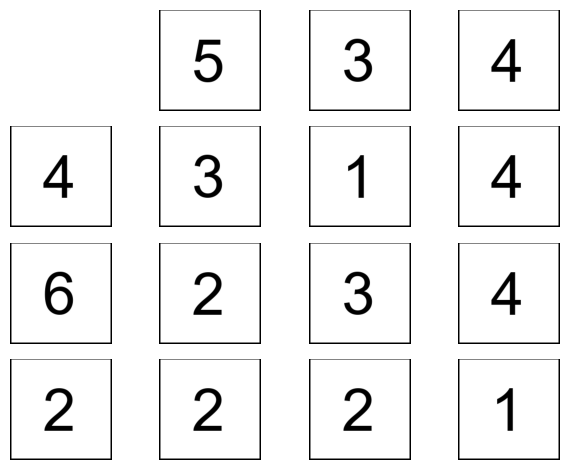

In [5]:
show_matrix(matrix1)

In [6]:
matrix1.solve()

Solved!


The solved matrix will retain the column and row clues, and only the Squares that are selected.

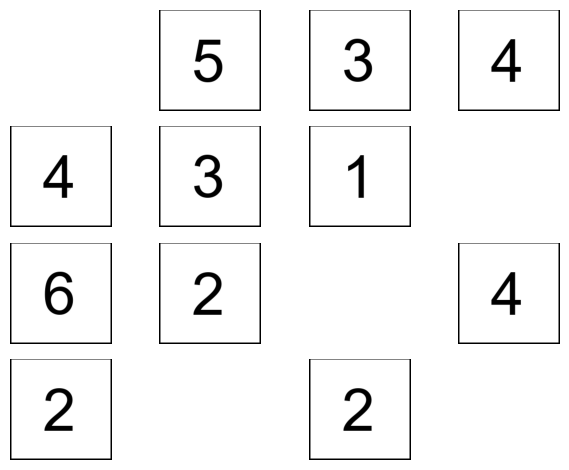

In [7]:
show_matrix(matrix1)

# Puzzle from Excel

To instantiate a Matrix from an excel file, the preferred method is to use `Matrix.from_excel`. If there is more than 1 sheet in the file, make sure you specify the sheet_name.

NOTE: interpreting colors from excel is still a WIP, so we have to change the colors to something that can be displayed (the puzzle can be solved whether or not the colors are real. but the display will not show uninterpretable colors.)

In [8]:
matrix2 = Matrix.from_excel('data/dummy_puzzles.xlsx', sheet_name='colors_ex1')
matrix2.change_colors(['blue', 'red'])

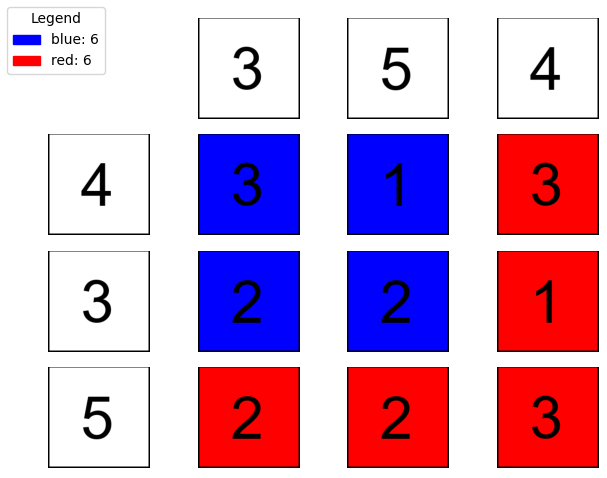

In [9]:
show_matrix(matrix2)

In [10]:
matrix2.solve()

Solved!


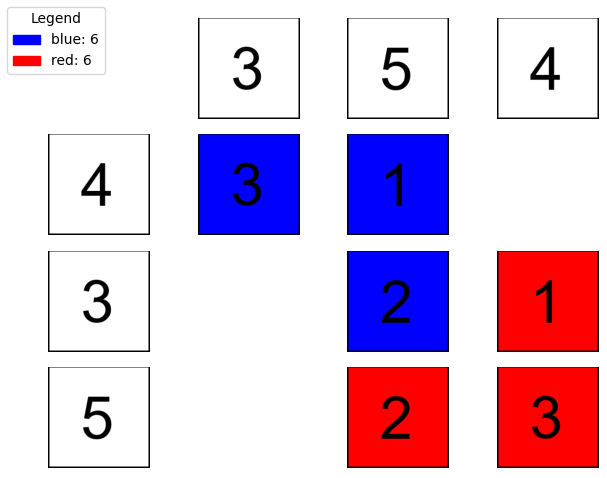

In [11]:
show_matrix(matrix2)

# Puzzle with Code

We can create a puzzle from scratch. We start with a blank matrix, only specifying the size. Then we can manually change the Square values and size.

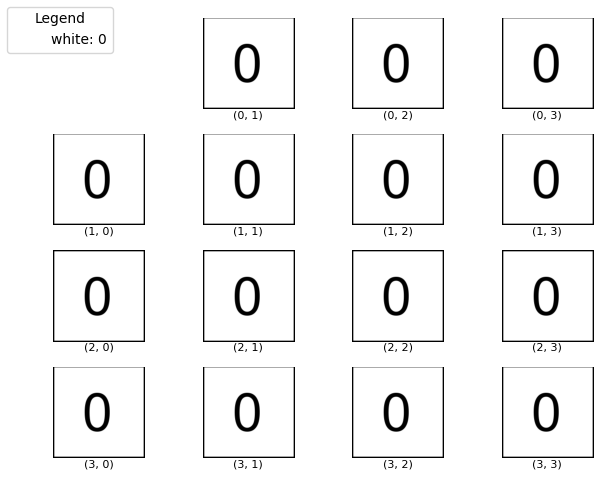

In [12]:
matrix3 = Matrix.zeros(3, True)
show_matrix(matrix3, plot_coordinates=True)

We update the Squares one by one using `update_square`; parameters are the coordinates of the square and the value we are setting

In the code I refere to the clues for rows, columns, and colors as 'Groups'. The values are the target value for the respective row and column

In [13]:
# Group columns
matrix3.update_square((0,1), 3)
matrix3.update_square((0,2), 5)
matrix3.update_square((0,3), 4)

# Group rows
matrix3.update_square((1,0), 4)
matrix3.update_square((2,0), 3)
matrix3.update_square((3,0), 5)

We update the Sqaures the matrix will used to solve the puzzle in the same way as the Group Squares. However, because in this case we want to create a puzzle with colors, we are adding a parameter for the colors of the square.

In [14]:
# squares first row
matrix3.update_square((1,1), 3, 'red')
matrix3.update_square((1,2), 1, 'red')
matrix3.update_square((1,3), 3, 'blue')

# squares second row
matrix3.update_square((2,1), 2, 'red')
matrix3.update_square((2,2), 2, 'red')
matrix3.update_square((2,3), 1, 'blue')

# squares third row
matrix3.update_square((3,1), 2, 'blue')
matrix3.update_square((3,2), 2, 'blue')
matrix3.update_square((3,3), 3, 'blue')

Lastly we will update the colors using the `update_color_target` function; parameters are the color and the target value

In [15]:
# update color stuff

# add color targets
matrix3.update_color_target('red', 6)
matrix3.update_color_target('blue', 6)

# remove the default white color target
matrix3.remove_color_taget('white')

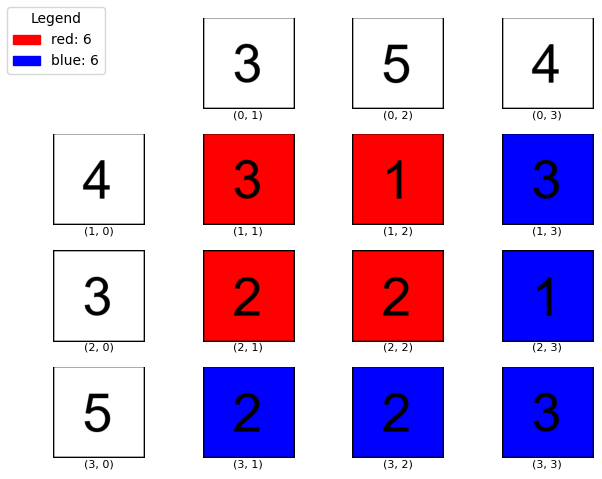

In [16]:
show_matrix(matrix3, plot_coordinates=True)

In [17]:
matrix3.solve()

Solved!


# Puzzle from Image

From an image of the puzzle, you can create a Matrix. As of today, images cannot handle puzzles with color.

In [18]:
from matplotlib import pyplot as plt
from number_sums_solver.images.matrix_image import MatrixImage

In [19]:
matrix_image = MatrixImage.from_path('data/img_puzzle2.jpeg')

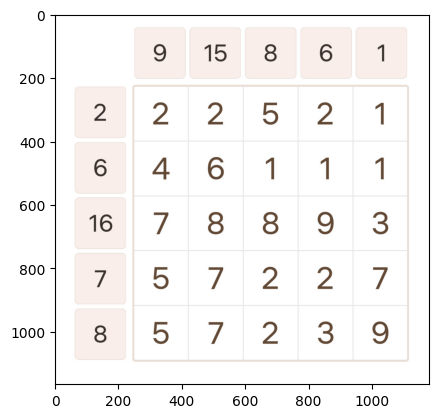

In [20]:
plt.imshow(matrix_image.image);

You create a Matrix from the image using `to_matrix`. Then you should be able to solve normally. OCR for the images can be bad sometimes, so its best to ensure that the Matrix was created correctly before solving. Note that even if the image may have loaded correctly in the past, this does not guaruntee that it will in the future. Reasoning below. If you need to update the Squares, do so before calling `solve`.

TLDR: The processing of the image involves finding the contors of each digit individually. Sometimes even if the proper region to identify the digit is present, pytesseract cannot predict a value. In the event this occurs, a random resizing of the digit will occur until pytesseract can label the value; thus it is theoretically possible - though inprobable -- that while a digit was correctly identified before, it will not be in the future. Pytesseract does not bat a thousand.

In [21]:
matrix4 = matrix_image.to_matrix()

C:\Users\Matt\Documents\GitHub\number-sums-solver\number_sums_solver\images\region.py:35: RuntimeWarning: overflow encountered in scalar subtract
  d_arr += np.array([abs(code[i] - t[i]) for t in color_dict.values()])


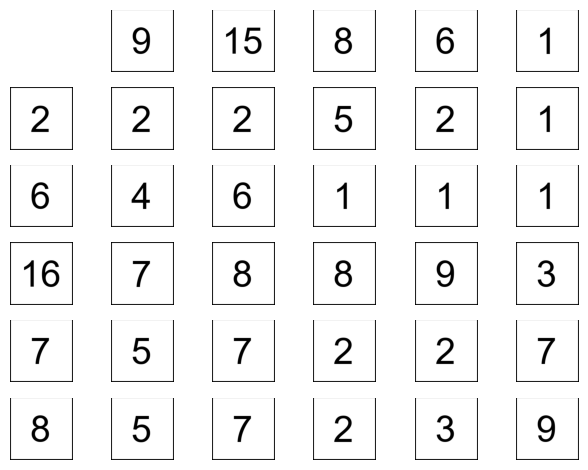

In [22]:
show_matrix(matrix4)

Solved!


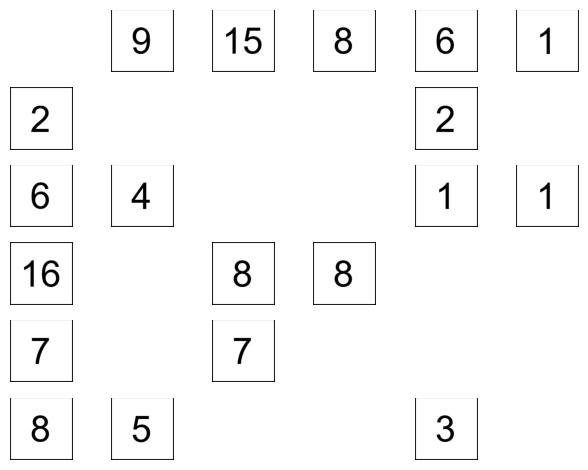

In [23]:
matrix4.solve()
show_matrix(matrix4)